In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")

### load breast cancer dataset from scikit-learn

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
R, C = cancer.data.shape
R, C

(569, 30)

### Split the data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.3, shuffle=True)

### Pre-processing the data

In [12]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Build the model

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(C,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [18]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [19]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 4s 9ms/sample - loss: 1.1543 - accuracy: 0.2538 - val_loss: 1.0204 - val_accuracy: 0.2865
Epoch 2/100
398/398 [==============================] - 0s 573us/sample - loss: 1.0354 - accuracy: 0.3116 - val_loss: 0.9092 - val_accuracy: 0.3567
Epoch 3/100
398/398 [==============================] - 0s 181us/sample - loss: 0.9245 - accuracy: 0.3744 - val_loss: 0.8116 - val_accuracy: 0.4152
Epoch 4/100
398/398 [==============================] - 0s 181us/sample - loss: 0.8278 - accuracy: 0.4523 - val_loss: 0.7258 - val_accuracy: 0.5614
Epoch 5/100
398/398 [==============================] - 0s 193us/sample - loss: 0.7437 - accuracy: 0.5352 - val_loss: 0.6523 - val_accuracy: 0.6316
Epoch 6/100
398/398 [==============================] - 0s 201us/sample - loss: 0.6713 - accuracy: 0.6080 - val_loss: 0.5915 - val_accuracy: 0.6959
Epoch 7/100
398/398 [==============================] - 0s 216us/sample - l

398/398 [==============================] - 0s 193us/sample - loss: 0.1447 - accuracy: 0.9648 - val_loss: 0.1599 - val_accuracy: 0.9591
Epoch 57/100
398/398 [==============================] - 0s 173us/sample - loss: 0.1429 - accuracy: 0.9648 - val_loss: 0.1586 - val_accuracy: 0.9591
Epoch 58/100
398/398 [==============================] - 0s 203us/sample - loss: 0.1411 - accuracy: 0.9648 - val_loss: 0.1571 - val_accuracy: 0.9649
Epoch 59/100
398/398 [==============================] - 0s 156us/sample - loss: 0.1394 - accuracy: 0.9648 - val_loss: 0.1559 - val_accuracy: 0.9649
Epoch 60/100
398/398 [==============================] - 0s 168us/sample - loss: 0.1378 - accuracy: 0.9648 - val_loss: 0.1545 - val_accuracy: 0.9649
Epoch 61/100
398/398 [==============================] - 0s 161us/sample - loss: 0.1361 - accuracy: 0.9648 - val_loss: 0.1534 - val_accuracy: 0.9649
Epoch 62/100
398/398 [==============================] - 0s 175us/sample - loss: 0.1347 - accuracy: 0.9648 - val_loss: 0.1523 

In [20]:
print(f"Train score: {model.evaluate(X_train, y_train)}")
print(f"Test score: {model.evaluate(X_test, y_test)}")

398/398 [==============================] - 0s 90us/sample - loss: 0.0968 - accuracy: 0.9724
Train score: [0.09677085761523727, 0.9723618]
171/171 [==============================] - 0s 82us/sample - loss: 0.1258 - accuracy: 0.9766
Test score: [0.12579104404526148, 0.9766082]


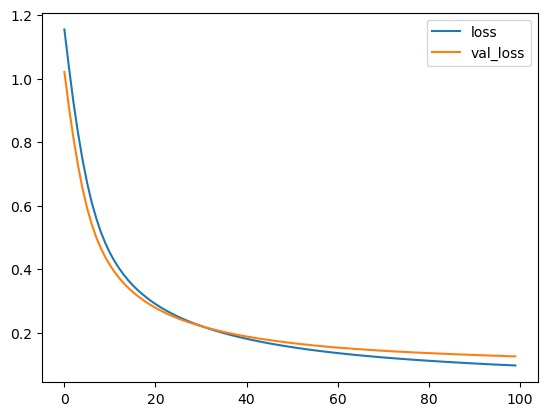

In [22]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

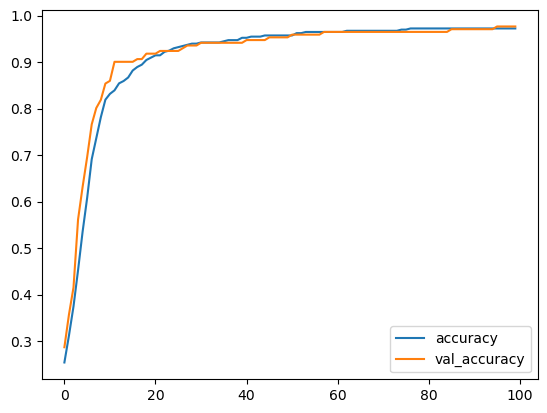

In [23]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();